In [1]:
# Install necessary libraries using pip if not already installed
# !pip install pandas seaborn matplotlib numpy scikit-learn statsmodels

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
import statsmodels.api as sm
from matplotlib.gridspec import GridSpec
#from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# To suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load data
data = pd.read_csv("breast_cancer.csv")

# Display structure and dimensions of the data
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


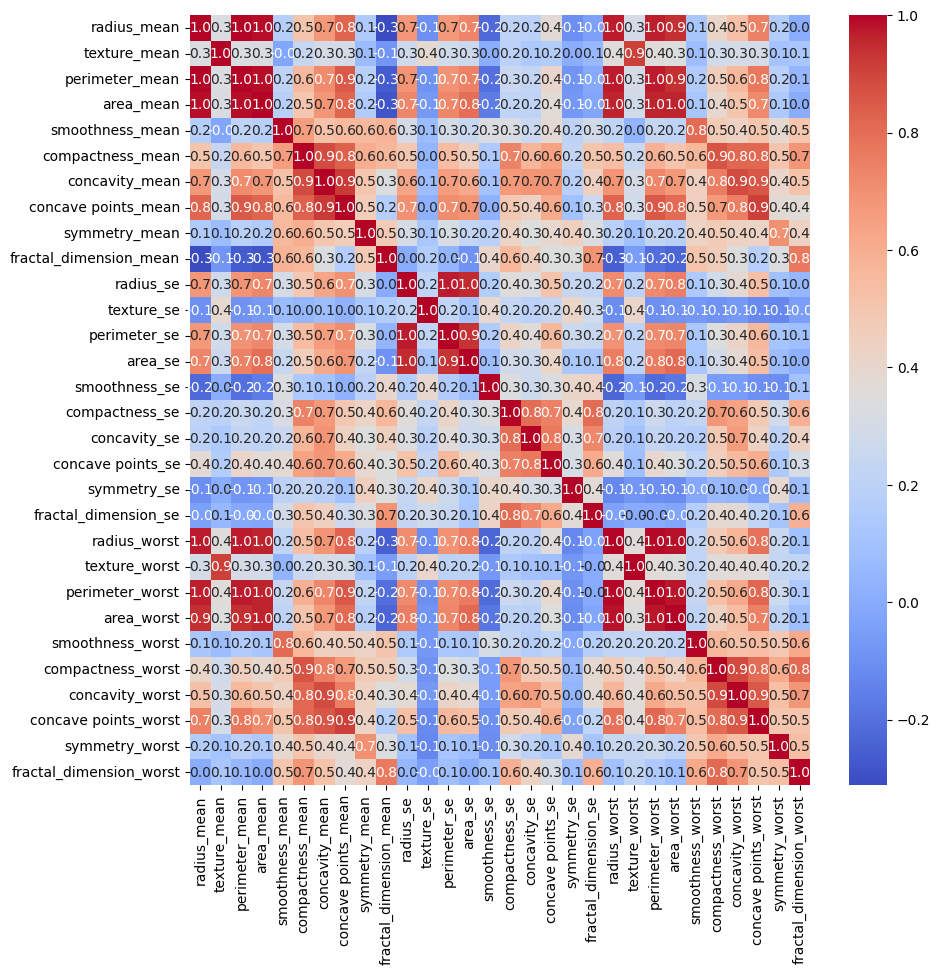

In [4]:
# Compute the correlation matrix
corr_mat = data.iloc[:, 2:].corr()
# Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr_mat, annot=True, fmt=".1f", cmap="coolwarm")
plt.show()


In [5]:
# Convert diagnosis column to a categorical type
data['diagnosis'] = pd.Categorical(data['diagnosis'])
print(data['diagnosis'].dtype)

# Optionally, relabel the diagnosis column
data['diagnosis'] = data['diagnosis'].cat.rename_categories(["B", "M"])
print(data['diagnosis'].dtype)

category
category


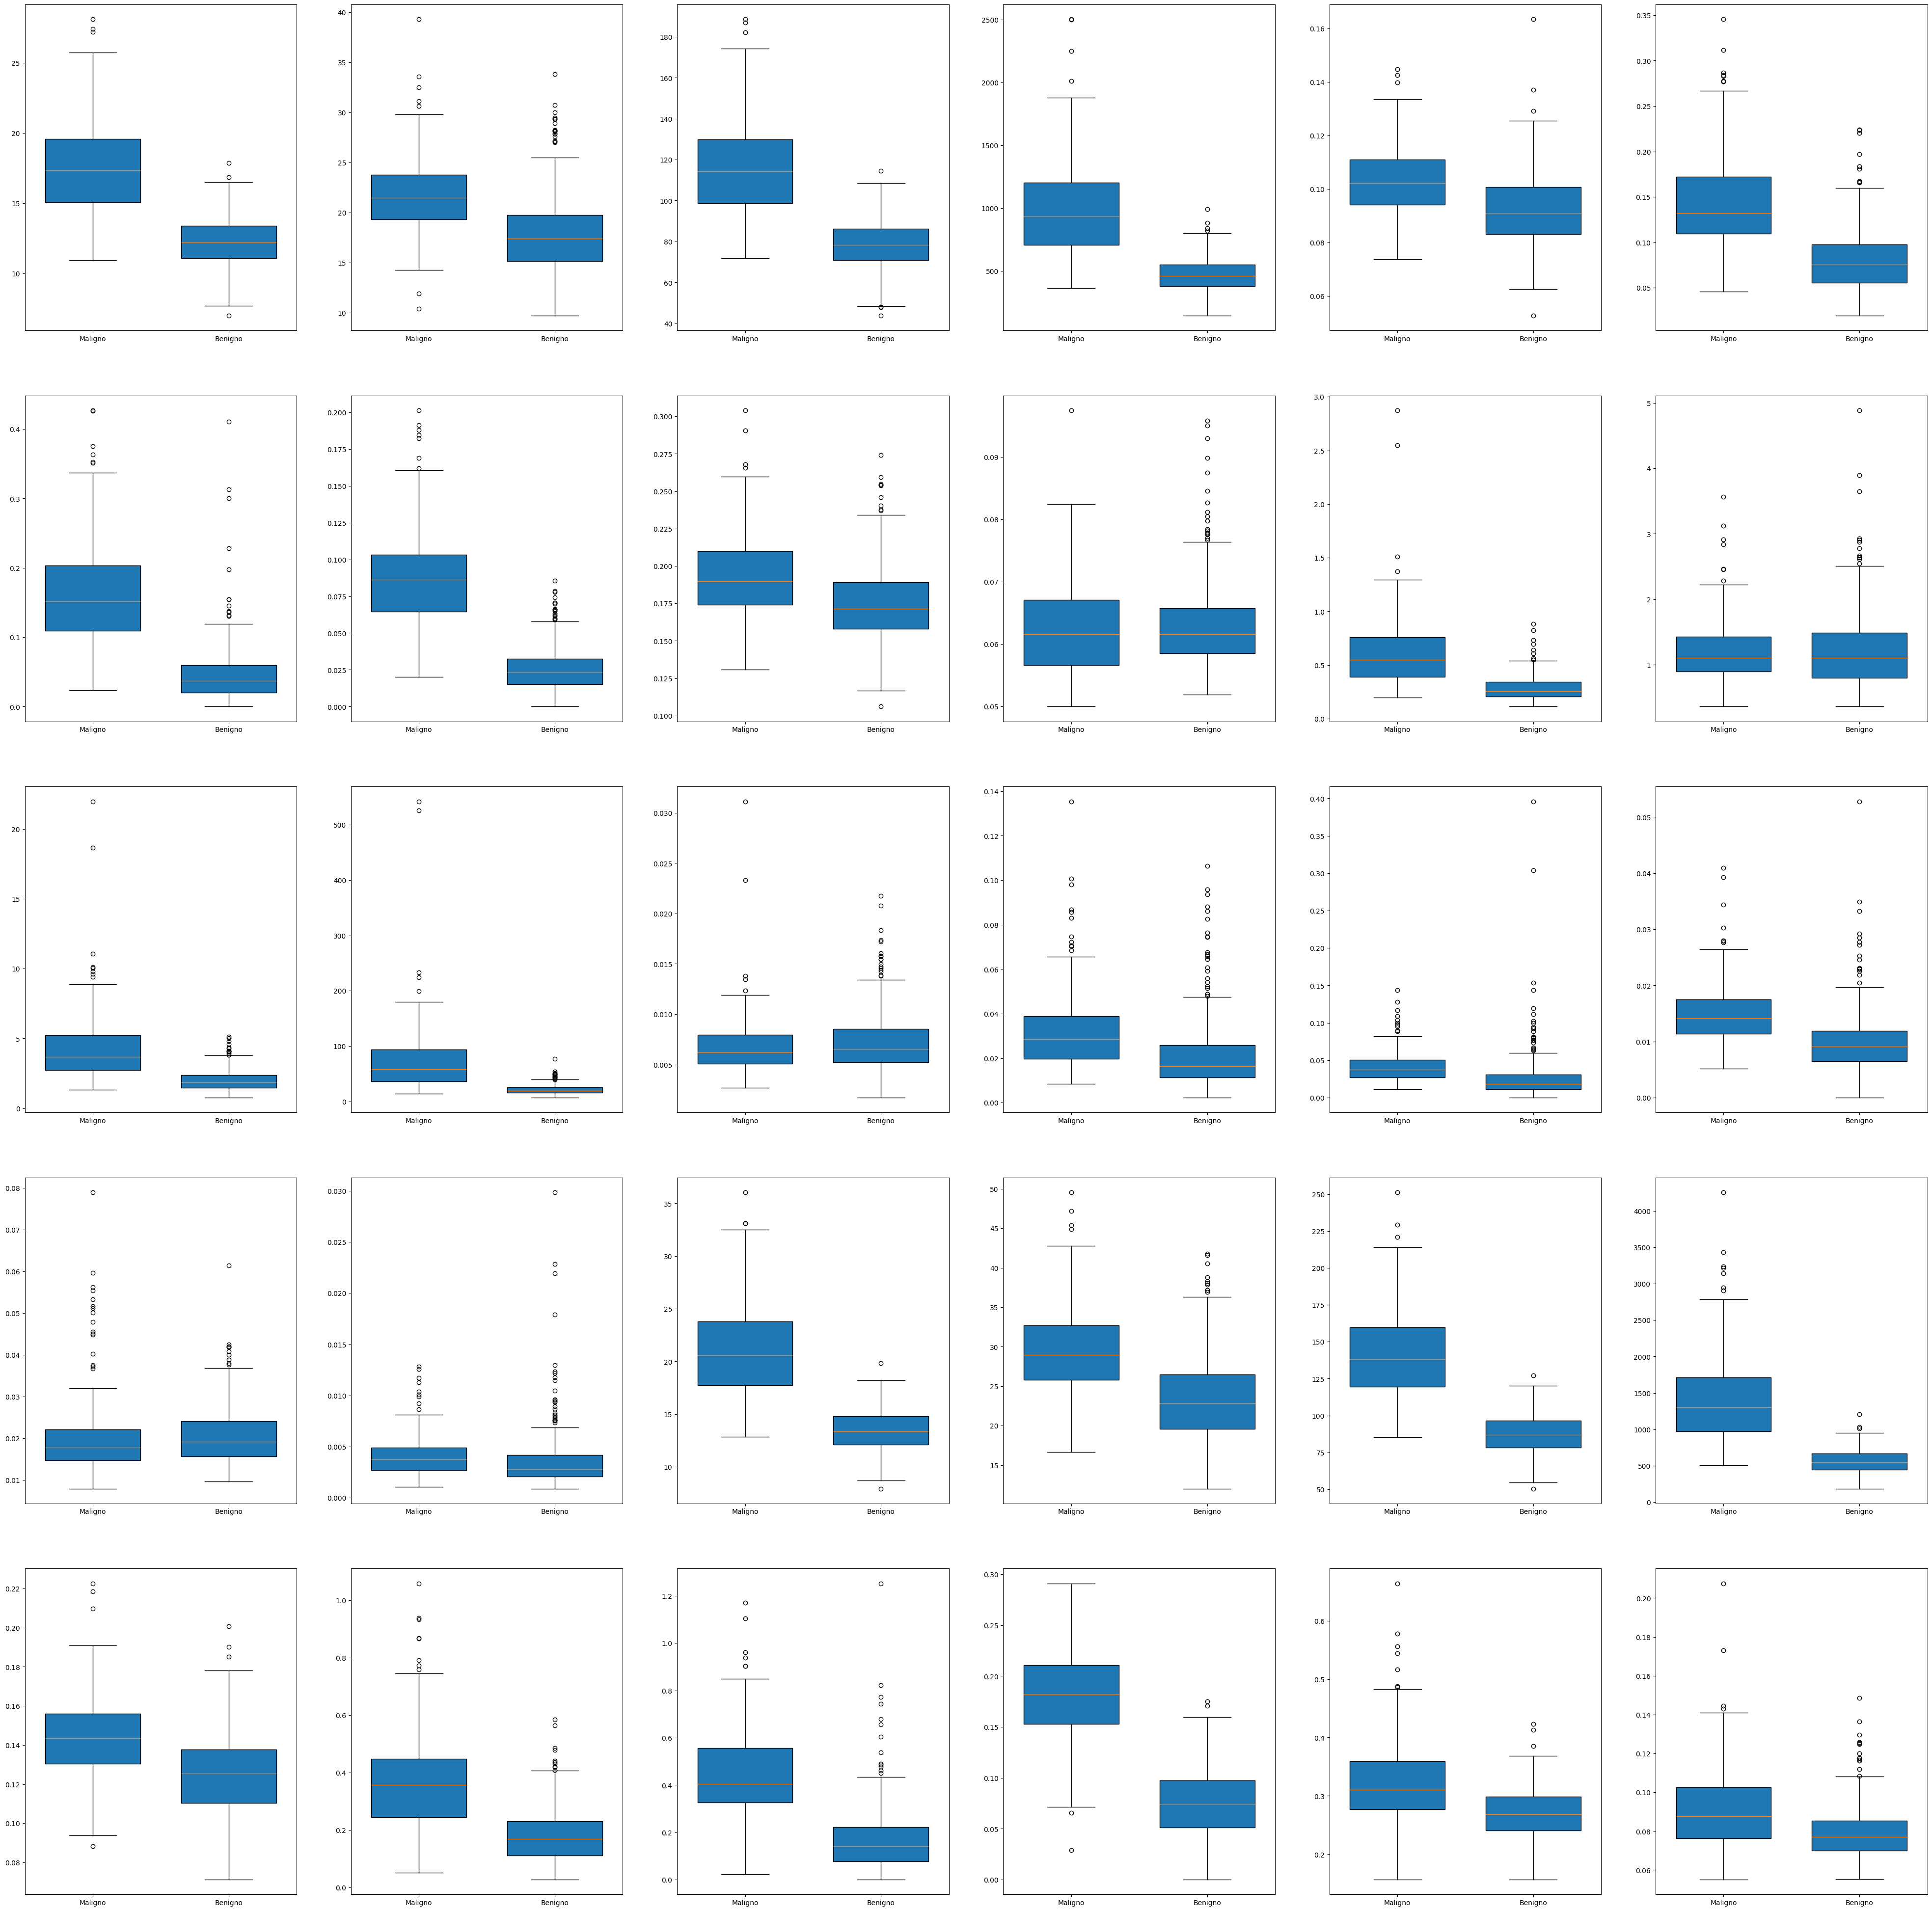

In [6]:
# Boxplots for each feature grouped by diagnosis
# LOLLO BLOCKKKK

num_colonne = data.shape[1]
plots_list = []

fig, axs = plt.subplots(5, 6, figsize=(50, 50))

for i in range(2, num_colonne):
    row = (i-2) // 6
    col = (i-2) % 6
    axs[row, col].boxplot(
        [data[data["diagnosis"] == "M"].iloc[:, i], data[data["diagnosis"] == "B"].iloc[:, i]], 
        positions=[1, 2], 
        widths=0.7,
        patch_artist=True,
        labels=["Maligno", "Benigno"]
    )

In [7]:
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


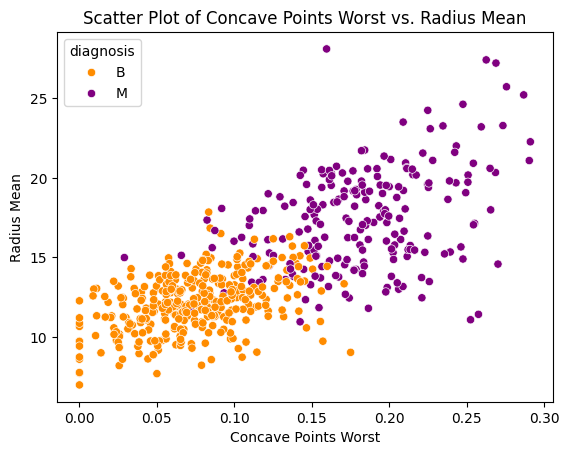

In [8]:
palette = {'B': 'darkorange', 'F': 'cyan4', 'M': 'purple'}  # Add all unique values to the palette dictionary
sns.scatterplot(data=data, x='concave points_worst', y='radius_mean', hue='diagnosis', palette=palette)

# Add labels and title
plt.xlabel('Concave Points Worst')
plt.ylabel('Radius Mean')
plt.title('Scatter Plot of Concave Points Worst vs. Radius Mean')

# Display the plot
plt.show()

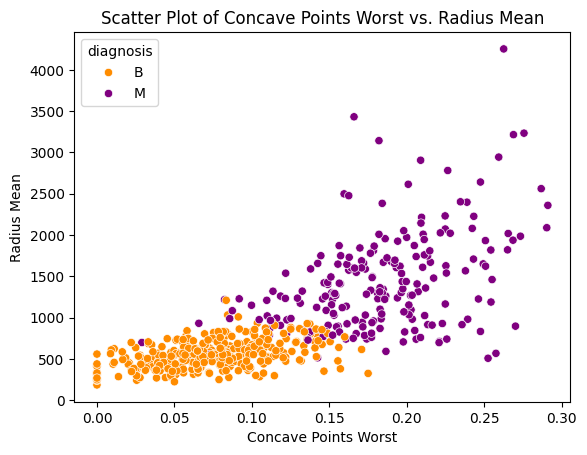

In [9]:
palette = {'B': 'darkorange', 'F': 'cyan4', 'M': 'purple'}  # Add all unique values to the palette dictionary
sns.scatterplot(data=data, x='concave points_worst', y='area_worst', hue='diagnosis', palette=palette)

# Add labels and title
plt.xlabel('Concave Points Worst')
plt.ylabel('Radius Mean')
plt.title('Scatter Plot of Concave Points Worst vs. Radius Mean')

# Display the plot
plt.show()

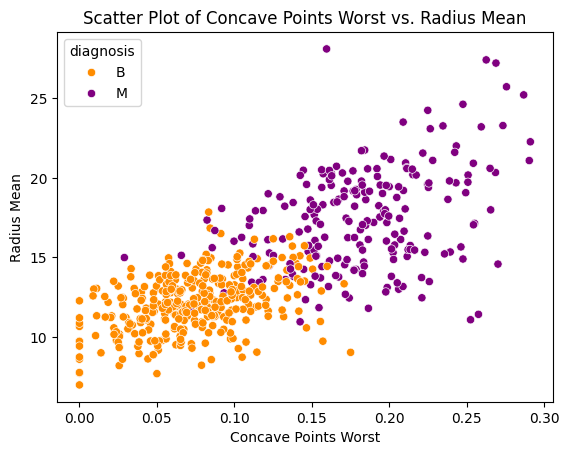

In [10]:
palette = {'B': 'darkorange', 'F': 'cyan4', 'M': 'purple'}  # Add all unique values to the palette dictionary
sns.scatterplot(data=data, x='concave points_worst', y='radius_mean', hue='diagnosis', palette=palette)

# Add labels and title
plt.xlabel('Concave Points Worst')
plt.ylabel('Radius Mean')
plt.title('Scatter Plot of Concave Points Worst vs. Radius Mean')

# Display the plot
plt.show()

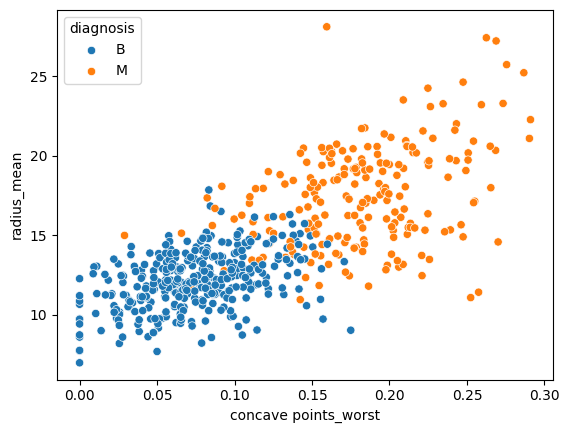

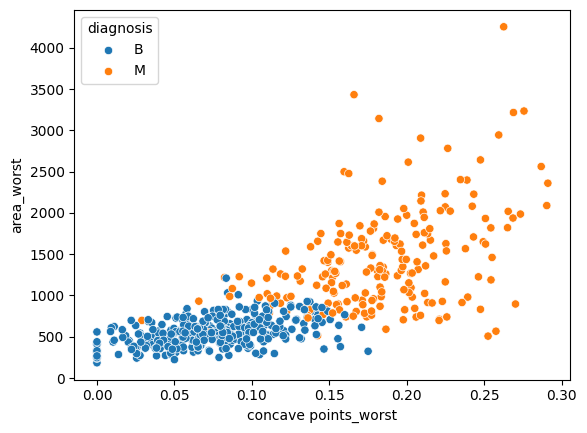

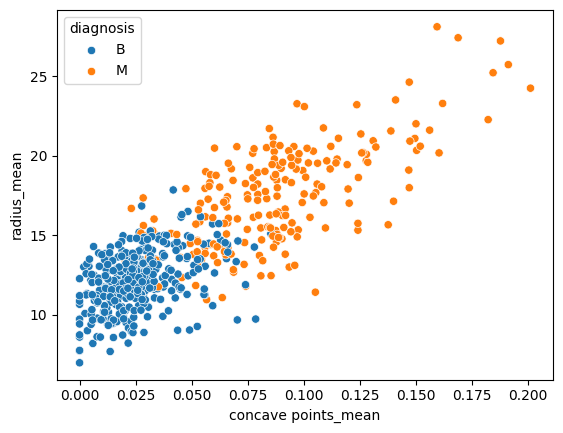

In [11]:
# Scatter plot examples
sns.scatterplot(x='concave points_worst', y='radius_mean', hue='diagnosis', data=data)
plt.show()

sns.scatterplot(x='concave points_worst', y='area_worst', hue='diagnosis', data=data)
plt.show()

sns.scatterplot(x='concave points_mean', y='radius_mean', hue='diagnosis', data=data)
plt.show()

In [12]:
##### NUOVA COLONNA PER CALIBRATION

# Converte i valori di y_test da 'B' e 'M' a 0 e 1
y_test_binary = np.array([0 if char == 'B' else 1 for char in data['diagnosis']])

# Aggiungere la colonna
data['diagnosisBin'] = y_test_binary

##### FINE NUOVA COLONNA

# Split data into train and test
train, test = train_test_split(data, test_size=0.25, random_state=2)

# Separate the features and target variable for training
X_train = train[['radius_mean', 'concave points_mean']]
y_train = train['diagnosis']

# Separate the features and target variable for testing
X_test = test[['radius_mean', 'concave points_mean']]
y_test = test['diagnosis']

### Logistic Regression

In [13]:
# Fit the model
log_reg = LogisticRegression(C=1e10, solver='liblinear')
log_reg.fit(X_train, y_train)

# Make predictions
pred_class = log_reg.predict(X_test)
pred_proba = log_reg.predict_proba(X_test)

# Evaluate the model performance
conf_matrix = confusion_matrix(y_test, pred_class)
print("Confusion Matrix:\n", conf_matrix)

precision = precision_score(y_test, pred_class, pos_label="M")
print("Precision:", precision)

recall = recall_score(y_test, pred_class, pos_label="M")
print("Recall:", recall)

Confusion Matrix:
 [[77 10]
 [ 6 50]]
Precision: 0.8333333333333334
Recall: 0.8928571428571429


In [14]:
# Get coefficients
coeff = pd.DataFrame(log_reg.coef_.transpose(), index=['radius_mean', 'concave points_mean'], columns=['Coefficient'])
print(coeff)

                     Coefficient
radius_mean             0.737309
concave points_mean    92.884790


In [15]:
# Classification report
report = classification_report(y_test, pred_class, target_names=["B", "M"])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.89      0.91        87
           M       0.83      0.89      0.86        56

    accuracy                           0.89       143
   macro avg       0.88      0.89      0.88       143
weighted avg       0.89      0.89      0.89       143



In [16]:
# NEW MODEL FOR CALIBRATION

# Separate the features and target variable for training
X_train = train[['radius_mean', 'concave points_mean']]
y_train = train['diagnosisBin']

# Separate the features and target variable for testing
X_test = test[['radius_mean', 'concave points_mean']]
y_test = test['diagnosisBin']

# Fit the model
log_reg2 = LogisticRegression(C=1e10, solver='liblinear')
log_reg2.fit(X_train, y_train)

LogisticRegression(C=10000000000.0, solver='liblinear')

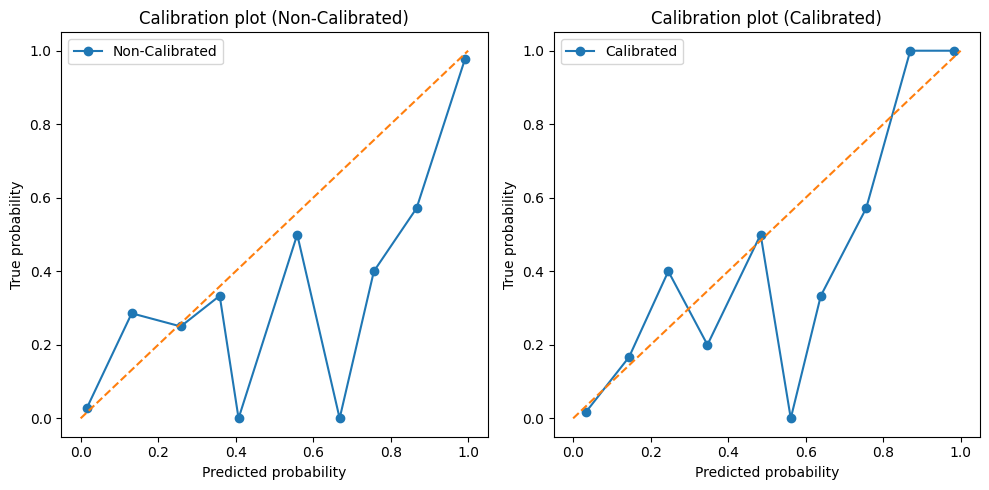

In [17]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
# Calibrazione del modello usando Platt Scaling
calibrated_model = CalibratedClassifierCV(log_reg2, method='sigmoid')
calibrated_model.fit(X_train, y_train)

# Predizione delle probabilità senza calibrazione
prob_pos = log_reg2.predict_proba(X_test)[:, 1]

# Predizione delle probabilità con calibrazione
calib_prob_pos = calibrated_model.predict_proba(X_test)[:, 1]

# Creazione dei calibration plots
plt.figure(figsize=(10, 5))

# Calibration plot senza calibrazione
plt.subplot(1, 2, 1)
prob_true, prob_pred = calibration_curve(y_test, prob_pos, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Non-Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration plot (Non-Calibrated)')
plt.legend()

# Calibration plot con calibrazione
plt.subplot(1, 2, 2)
calib_prob_true, calib_prob_pred = calibration_curve(y_test, calib_prob_pos, n_bins=10)
plt.plot(calib_prob_pred, calib_prob_true, marker='o', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration plot (Calibrated)')
plt.legend()

plt.tight_layout()
plt.show()

Odds ratio, Relative risk, Excess Risk, Attribute Risk, 

### Decision tree 3

In [18]:
from sklearn import tree
import matplotlib
import matplotlib.patches as mpatches

In [42]:
trees_train = train.drop(["diagnosis", "diagnosisBin"], axis=1)
trees_test = test.drop(["diagnosis", "diagnosisBin"], axis=1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(trees_train, train["diagnosis"])

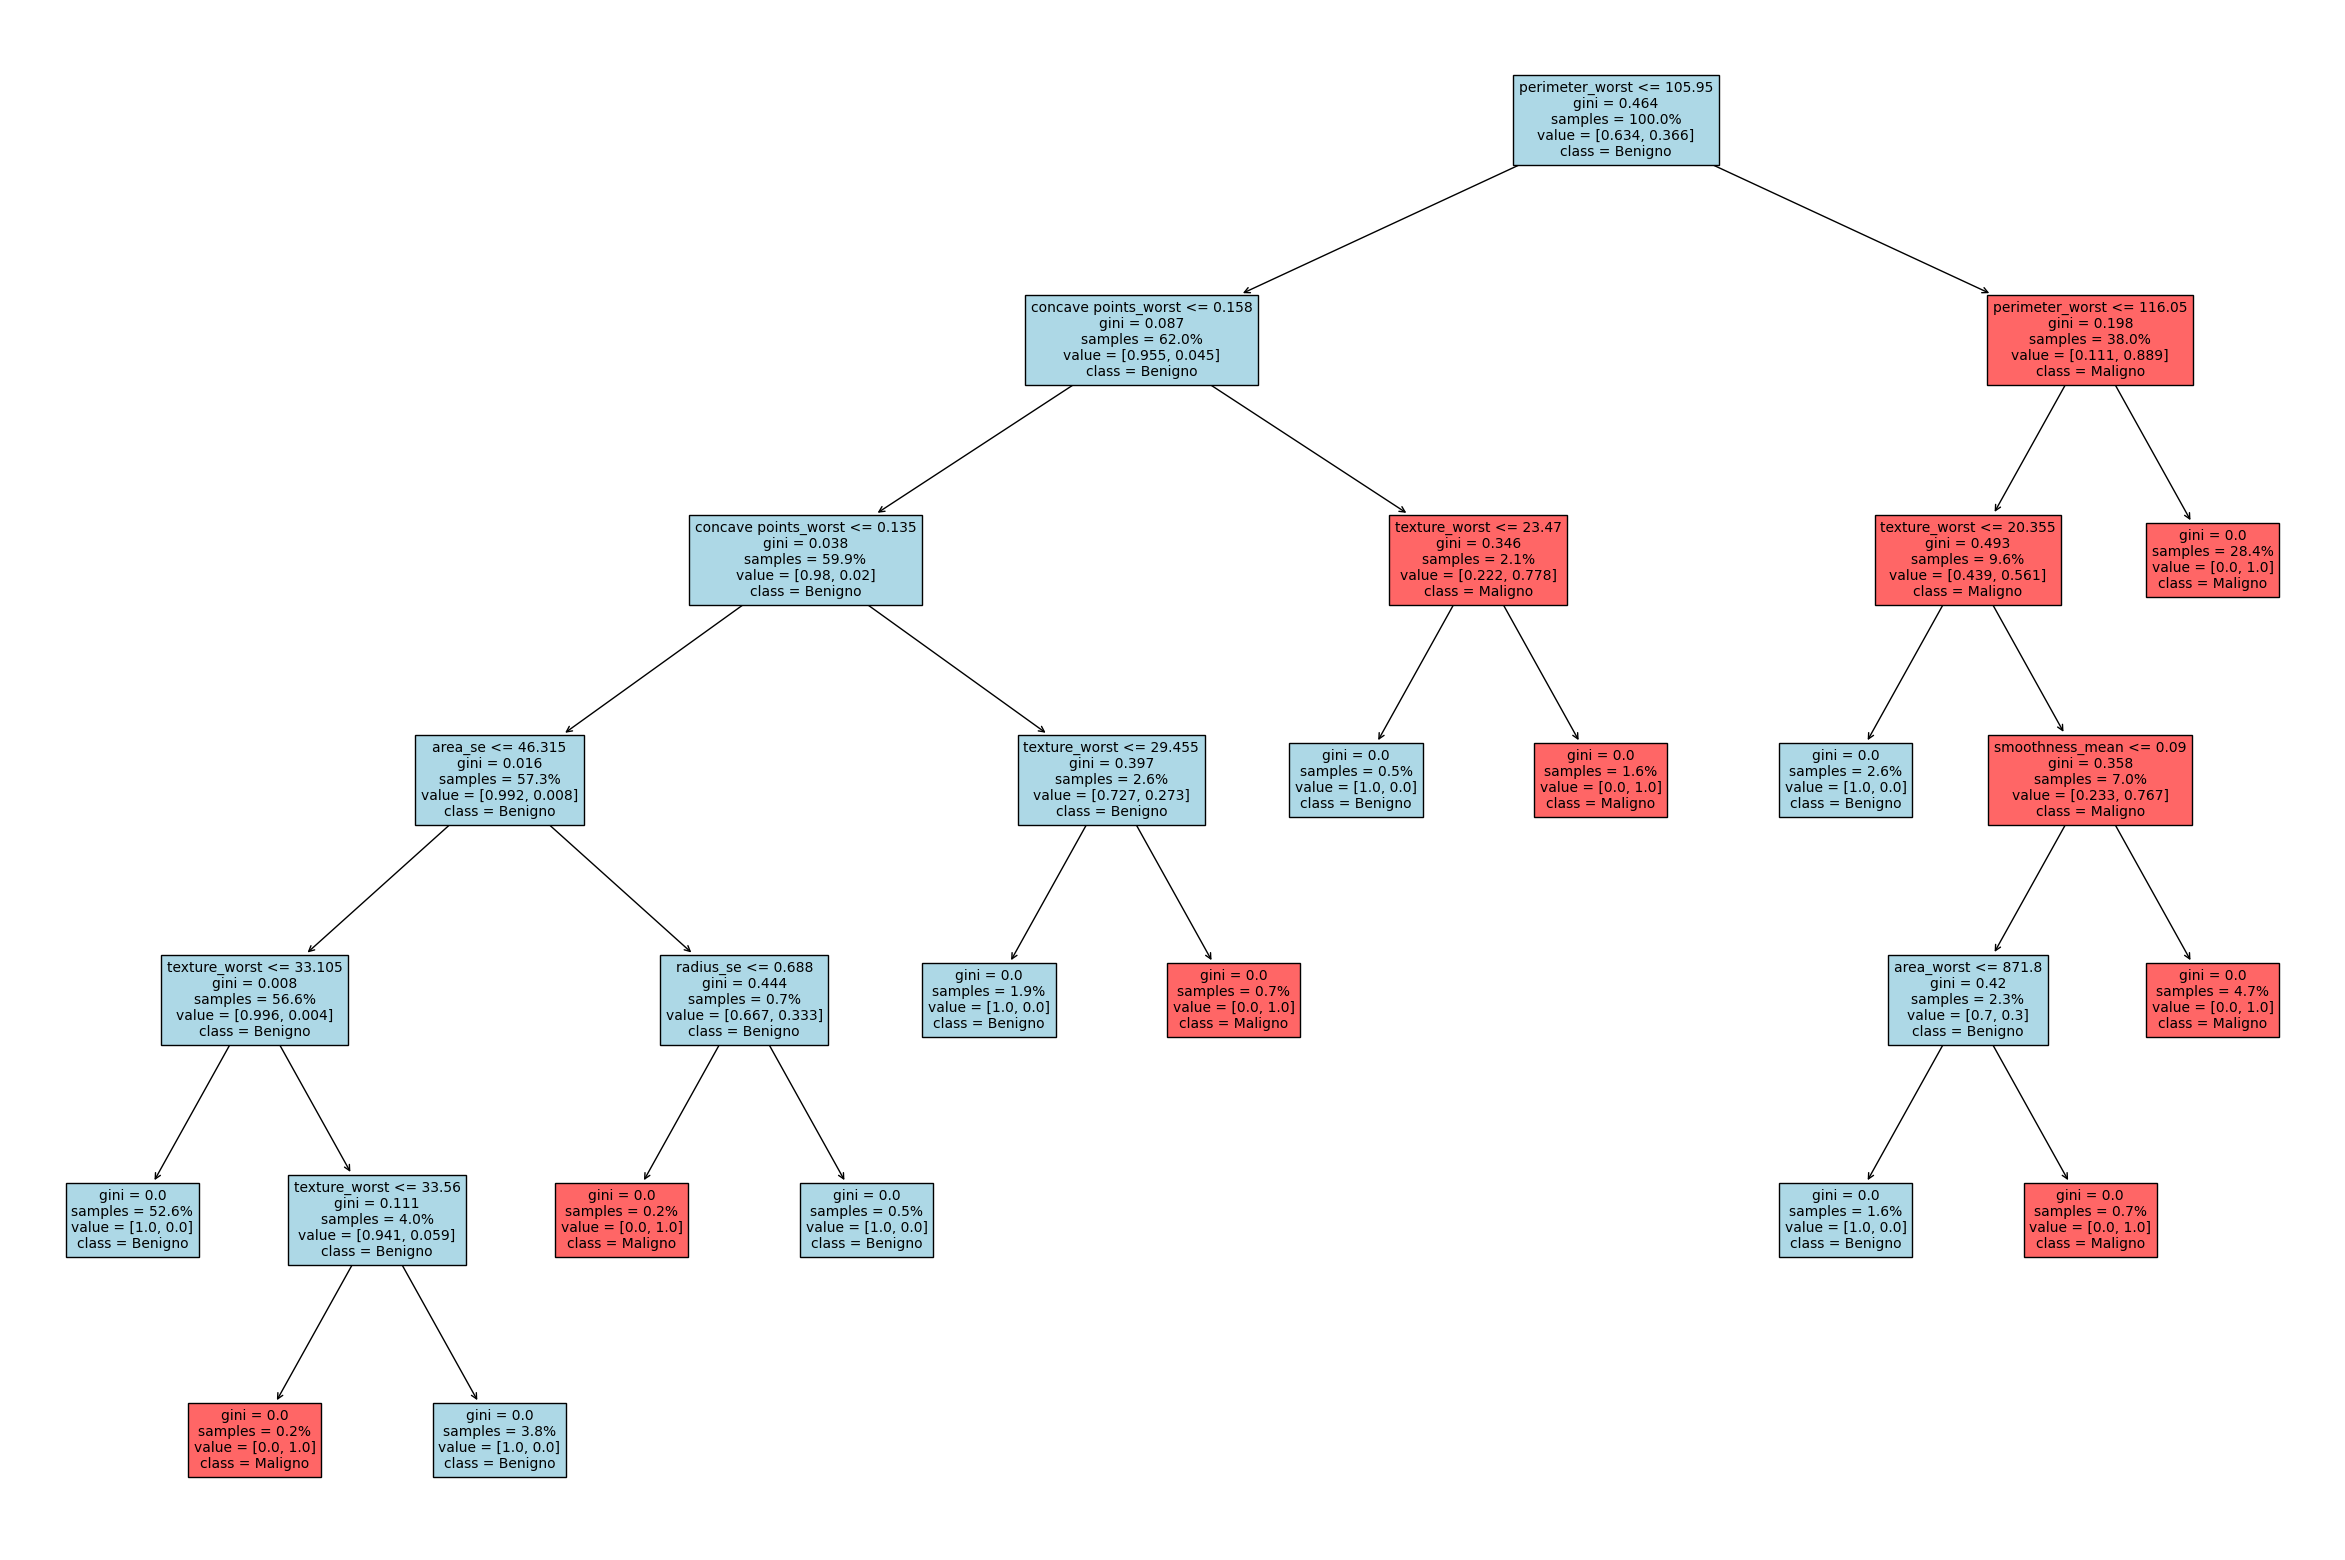

In [43]:
columns_names = data.columns.tolist()
benigno_label = "Benigno"
maligno_label = "Maligno"
benigno_color = "lightblue"
maligno_color = (1.0, 0.4, 0.4)
del columns_names[1]

tree.plot_tree(
  clf,
  feature_names=columns_names,
  class_names=[benigno_label, maligno_label],
  fontsize=10,
  filled=True,
  proportion=True,
)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 20)

for node in plt.gca().get_children():
  if isinstance(node, matplotlib.text.Annotation):
    if benigno_label in node.get_text():
      node.get_bbox_patch().set_facecolor(benigno_color)
    if maligno_label in node.get_text():
      node.get_bbox_patch().set_facecolor(maligno_color)


fig.savefig('tree.png')

In [44]:
predictions = clf.predict(trees_test)
acc = sum(predictions == test['diagnosis']) / len(predictions)
print(f"Accuracy: {acc}")

Accuracy: 0.9300699300699301


### Random Forest 

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [47]:
rf = RandomForestClassifier()
rf = rf.fit(trees_train, train["diagnosis"])

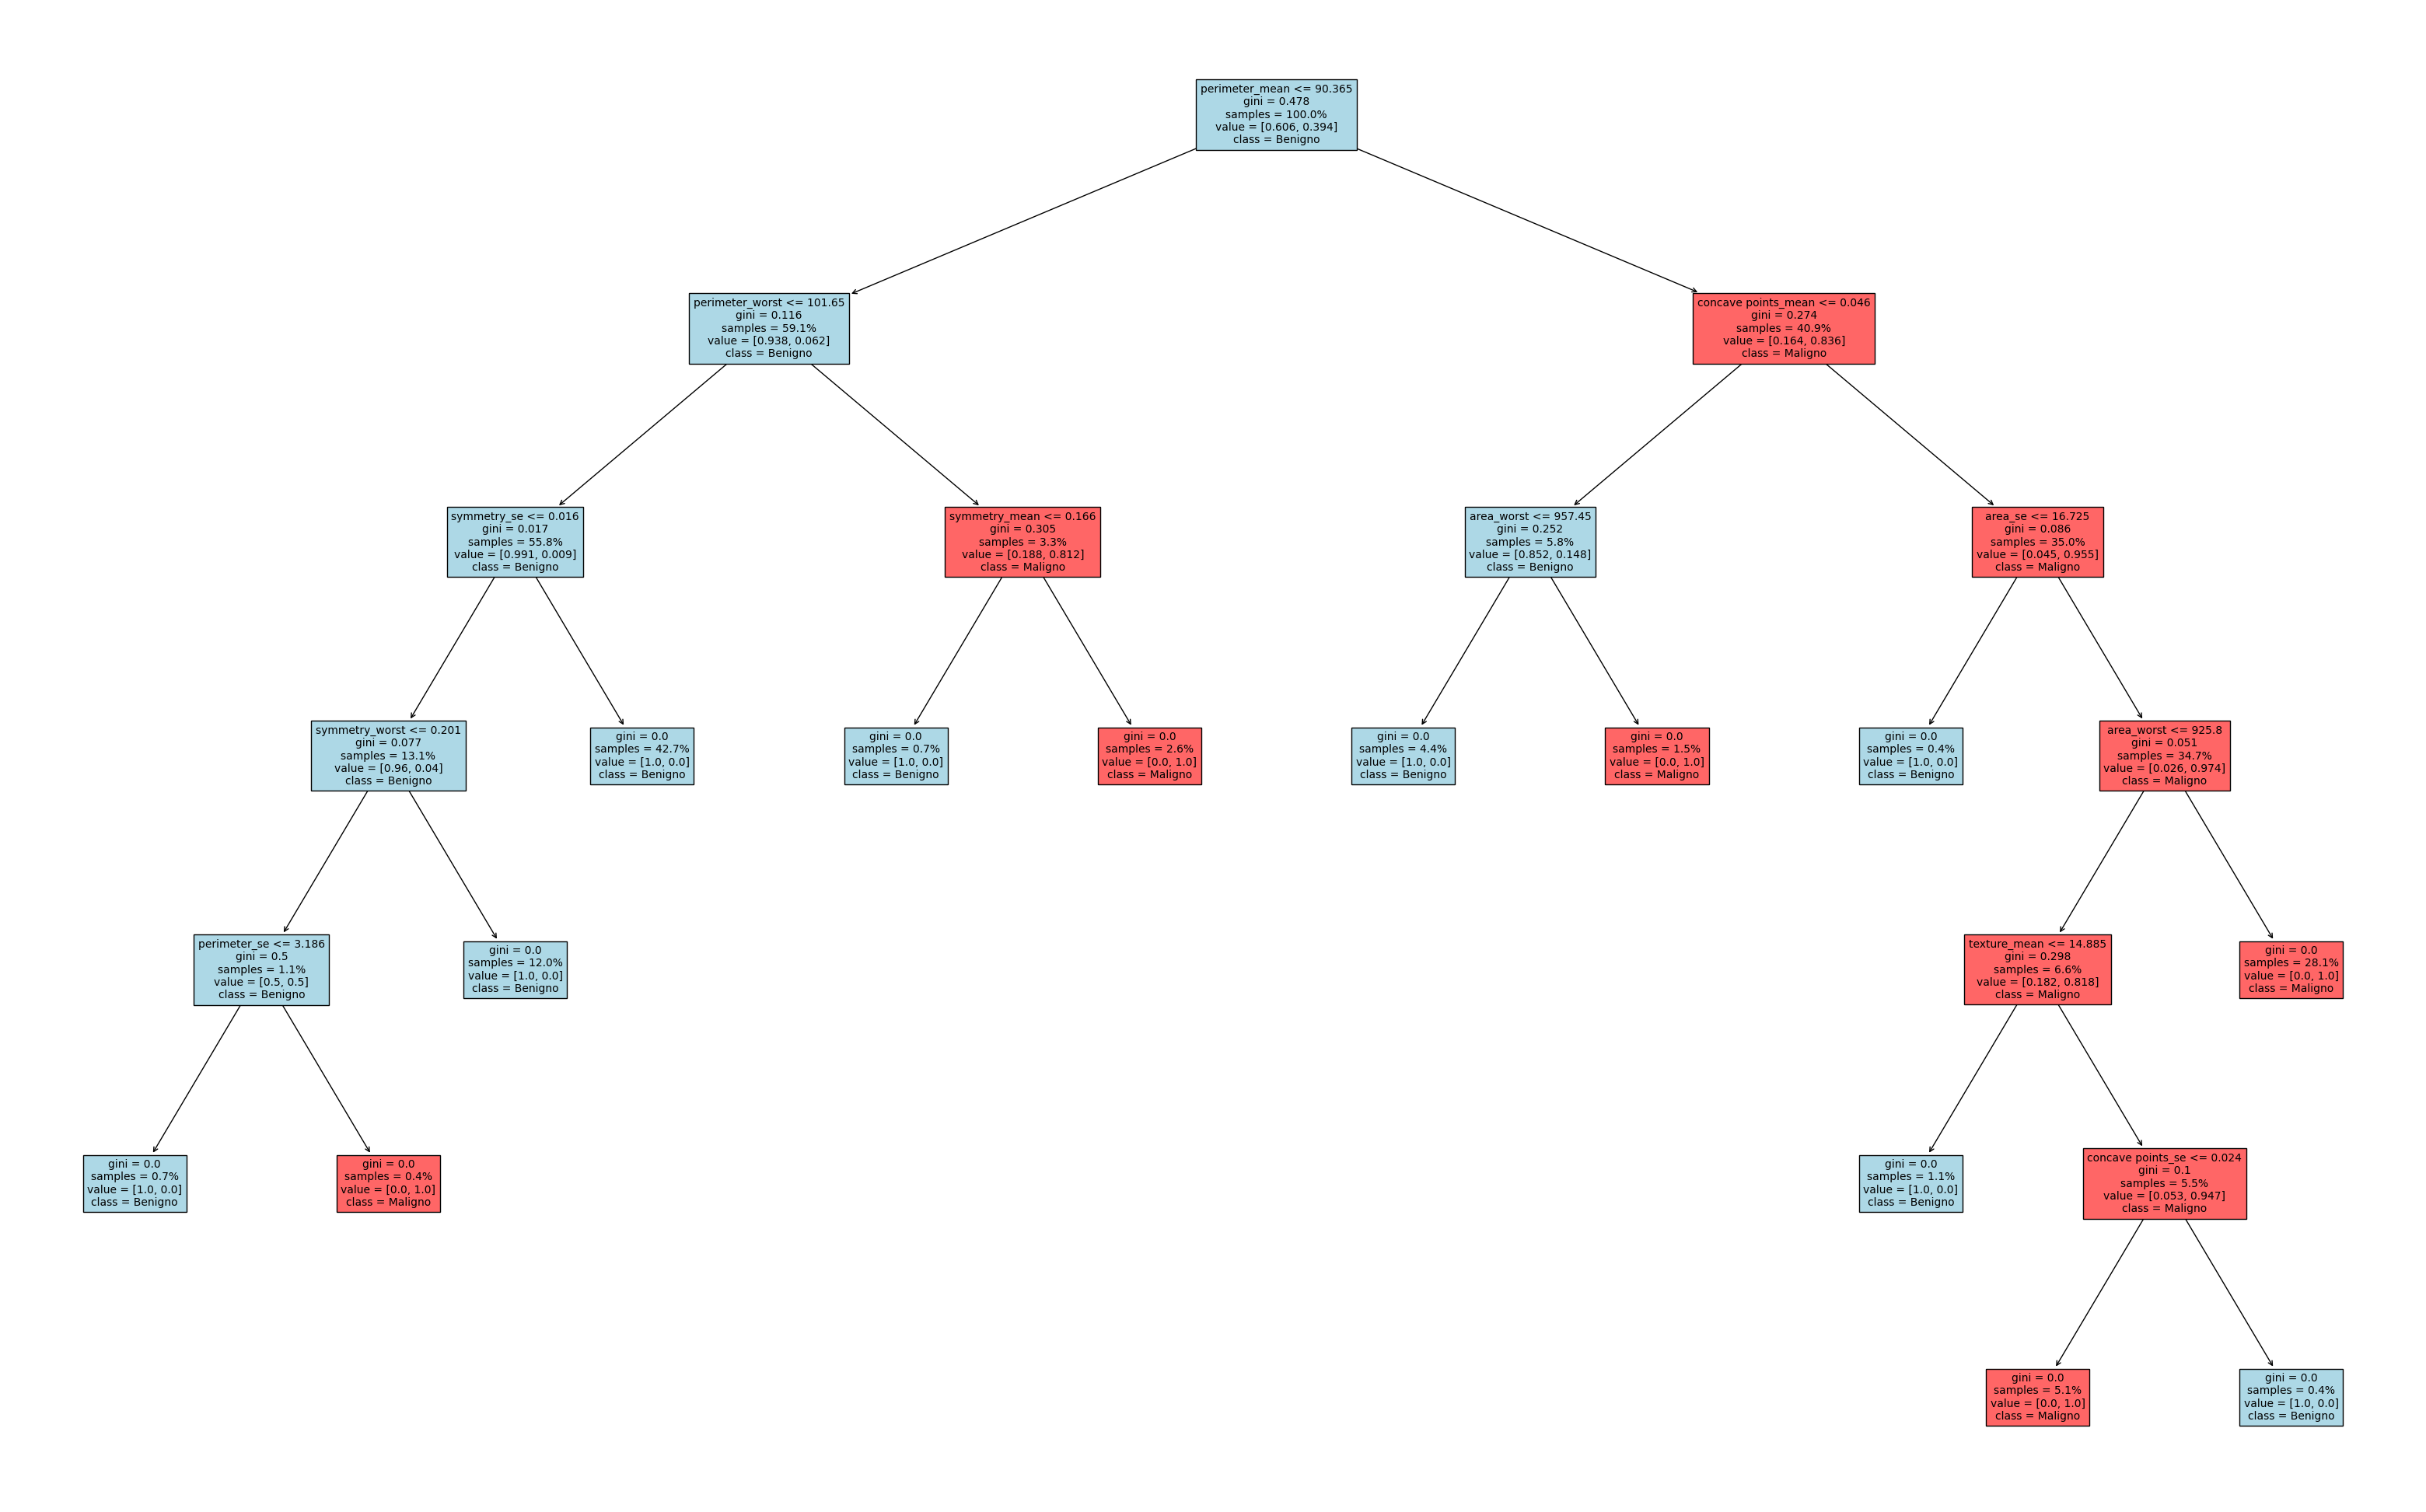

In [48]:
columns_names = data.columns.tolist()
estimator = rf.estimators_[0]

del columns_names[1]
plot_tree(
    estimator,
    feature_names=columns_names,
    class_names=["Benigno", "Maligno"],
    fontsize=10,
    filled=True,
    proportion=True,
)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(40, 25)

for node in plt.gca().get_children():
  if isinstance(node, matplotlib.text.Annotation):
    if benigno_label in node.get_text():
      node.get_bbox_patch().set_facecolor(benigno_color)
    if maligno_label in node.get_text():
      node.get_bbox_patch().set_facecolor(maligno_color)

plt.savefig('Random_forest.png')
plt.show()

In [50]:
predictions = rf.predict(trees_test)
acc = sum(predictions == test['diagnosis']) / len(predictions)
print(f"Accuracy: {acc}")

Accuracy: 0.9440559440559441


### K Neighbors Classifier (KNN)

In [423]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [424]:
knn_train_accuracy = []
knn_test_accuracy = []
knn_columns = ['texture_mean', 'area_mean']

for n_neighbors in range(2, 100):
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn = knn.fit(train[knn_columns], train["diagnosis"])
  knn_predictions = knn.predict(train[knn_columns])
  knn_train_accuracy.append(sum(knn_predictions == train['diagnosis']) / len(train['diagnosis']))
  knn_predictions = knn.predict(test[knn_columns])
  knn_test_accuracy.append(sum(knn_predictions == test['diagnosis']) / len(test['diagnosis']))
  

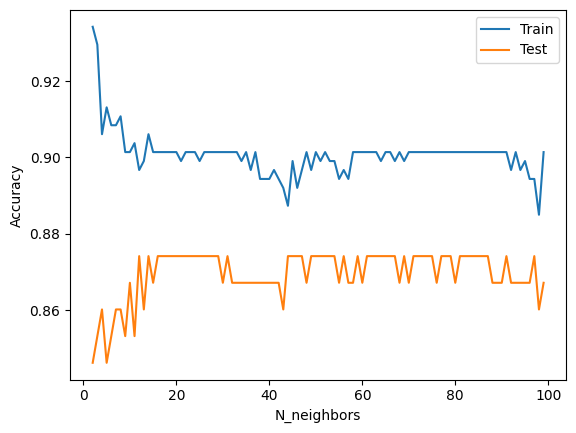

In [425]:
plt.plot(range(2, 100), knn_train_accuracy, label="Train")
plt.plot(range(2, 100), knn_test_accuracy, label="Test")
plt.xlabel("N_neighbors")
plt.ylabel("Accuracy")
plt.legend()

In [426]:
knn_train_accuracy = []
knn_test_accuracy = []

for n_neighbors in range(2, 100):
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn = knn.fit(train[['concave points_worst', 'radius_mean']], train["diagnosis"])
  knn_predictions = knn.predict(train[['concave points_worst', 'radius_mean']])
  knn_train_accuracy.append(sum(knn_predictions == train['diagnosis']) / len(train['diagnosis']))
  knn_predictions = knn.predict(test[['concave points_worst', 'radius_mean']])
  knn_test_accuracy.append(sum(knn_predictions == test['diagnosis']) / len(test['diagnosis']))

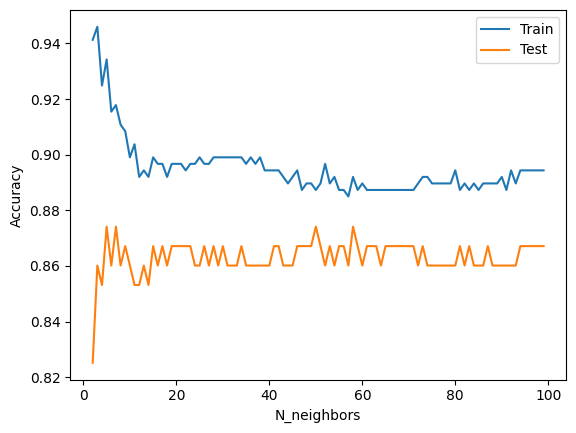

In [427]:
plt.plot(range(2, 100), knn_train_accuracy, label="Train")
plt.plot(range(2, 100), knn_test_accuracy, label="Test")
plt.xlabel("N_neighbors")
plt.ylabel("Accuracy")
plt.legend()

In [428]:
knn_accuracy = sum(knn_predictions == test['diagnosis']) / len(test['diagnosis'])
print(f"Accurcuracy: {knn_accuracy}")

Accurcuracy: 0.8671328671328671


### Support Vectors Classifier (SVC)

In [451]:
svc = LinearSVC()

parameters = {
    'penalty':['l2'],
    'C':[0.001, 0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 25, 30]
}
grid_search = GridSearchCV(svc, parameters)
grid_earch = grid_search.fit(X_train, y_train)
print(grid_search.best_params_, grid_search.best_score_)

{'C': 0.5, 'penalty': 'l2'} 0.8991518467852258


In [452]:
svc = LinearSVC(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'])
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
#y_pred

In [453]:
y_train_np = y_train.to_numpy()
y_train_np = np.where(y_train_np == 'B', 0, 1) # B --> 0, M --> 1 (needed for scatterplot colors)
y_train_np = y_train_np.reshape(-1,1)
#y_train_np

In [454]:
w0, w1 = svc.coef_[0]
b = svc.intercept_[0]
accuracy = svc.score(X_test, y_test)
print(accuracy)

0.8811188811188811


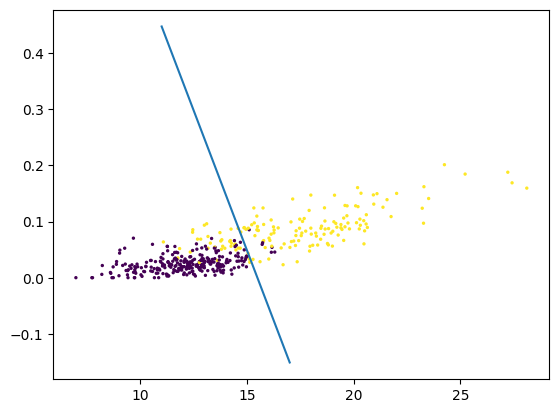

In [455]:
fig, ax = plt.subplots()

# separator Xs
x = np.linspace(11,17,2000).reshape(-1,1)

ax.scatter(X_train.loc[:, 'radius_mean'], X_train.loc[:, 'concave points_mean'], s=2, c=y_train_np)
ax.plot(x, -(w0/w1)*x - (b/w1))     # separator 
# ax.set_title('Train')
fig.show()

### Kernel SVC

In [456]:
from sklearn.svm import SVC

In [457]:
svc = SVC(kernel='rbf', C=30, gamma='scale')
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = svc.score(X_test, y_test)
print(accuracy)

0.8601398601398601


### ROC CURVE (AUC)

In [471]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve()